In [1]:
import seaborn as sns
import pandas as pd
import yfinance as yf
import numpy as np

In [2]:
data = pd.read_csv("../data/processed/weekly-rolling-binary-curated.csv")

In [3]:
df = pd.DataFrame()
df["index"] = data["index"]
df["rolling"] = data["stock_market"]

In [4]:
data

,Target,index,lag_1,debt,stocks,dow_jones,markets,unemployment,money,stock_market,crisis,nasdaq,finance,invest
0,1,0,0,0.263,0.313,0.020,0.460,0.047,0.383,0.090,0.337,0.357,0.390,0.213
1,1,1,1,0.257,0.293,0.020,0.427,0.047,0.390,0.090,0.360,0.327,0.390,0.220
2,0,2,1,0.253,0.290,0.017,0.443,0.047,0.400,0.087,0.383,0.300,0.393,0.207
3,0,3,0,0.253,0.290,0.013,0.473,0.047,0.420,0.087,0.403,0.283,0.387,0.223
4,1,4,0,0.260,0.290,0.013,0.510,0.043,0.427,0.087,0.393,0.283,0.390,0.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1,850,0,0.233,0.470,0.317,0.423,0.660,0.753,0.207,0.377,0.337,0.657,0.703
851,1,851,1,0.217,0.447,0.300,0.403,0.633,0.717,0.197,0.403,0.320,0.627,0.657
852,1,852,1,0.200,0.467,0.307,0.400,0.593,0.670,0.197,0.410,0.330,0.630,0.653
853,0,853,1,0.193,0.533,0.333,0.410,0.557,0.647,0.230,0.410,0.403,0.660,0.693


In [5]:
stock_market_df = pd.read_csv("../data/raw/weekly/stock_market.csv")
stock_market_df = stock_market_df[4:].reset_index()

In [6]:
df.insert(0, "actual", stock_market_df["Adjusted"])

In [7]:
ticker_df = yf.download("^DJI", period="max", interval="1wk")

ticker_df = ticker_df[-861:-5]
ticker_df = ticker_df.reset_index()

df["Close"] = ticker_df["Close"]

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.05, 'The red dots indicate a found peak. The data ranges from 2004—2020.')

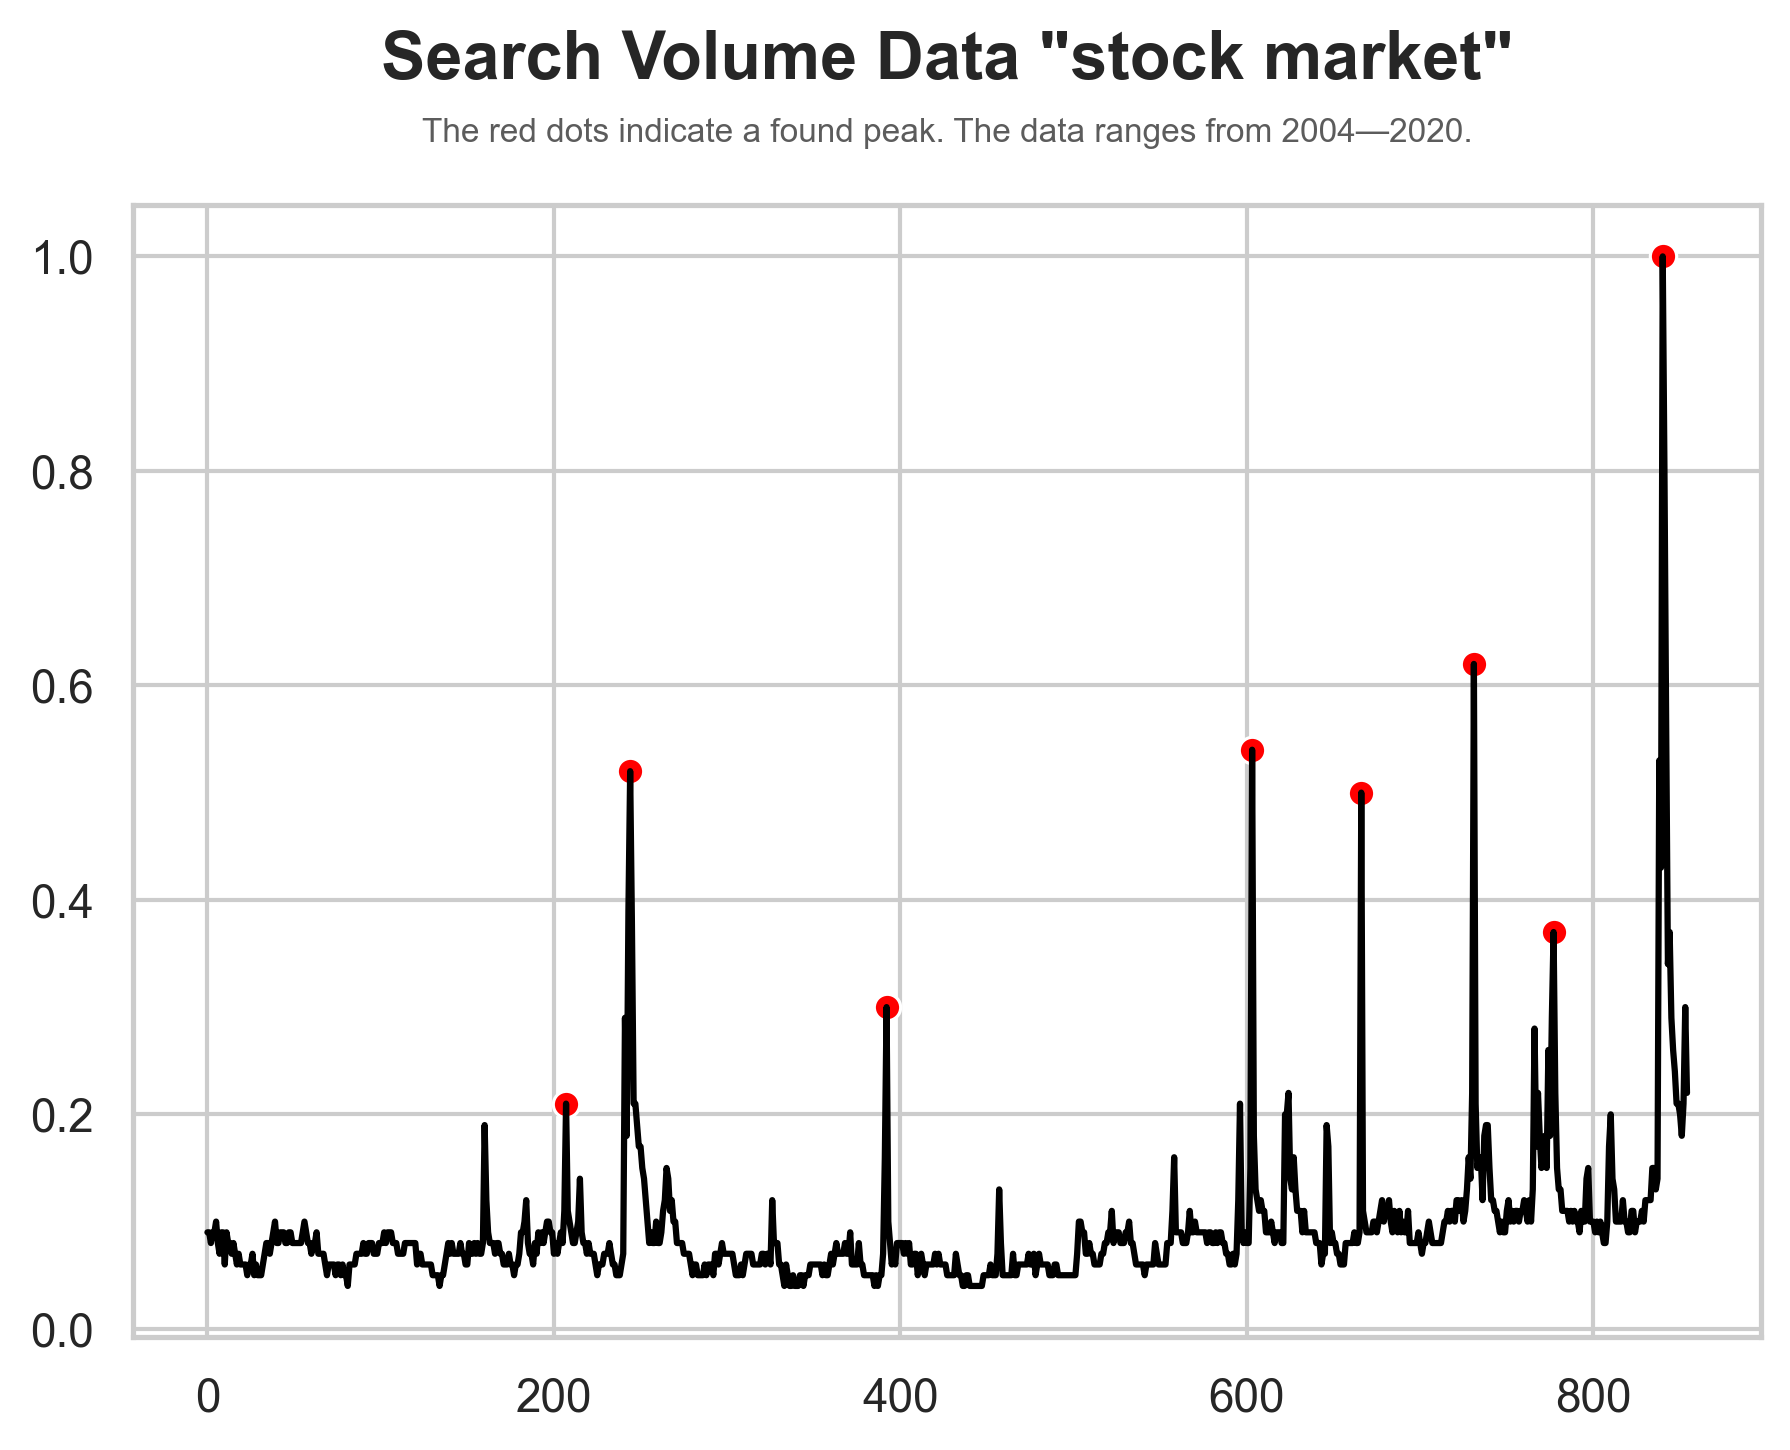

In [8]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


sns.set_style("whitegrid", {"font.sans_serif": "Liberation Sans"})
sns.set_context("notebook")

fig, ax = plt.subplots(1, 1, figsize = (7, 5), dpi=300)

x = np.array(df["actual"])
peaks, _ = find_peaks(x, prominence=0.15, width=1)
sns.lineplot(y=x, x=df.index, color="black")
sns.scatterplot(peaks, x[peaks], color="r", s=40)

ax.set_ylabel('')
ax.set_xlabel('')
ax.text(x=0.5, y=1.1, s='Search Volume Data "stock market"', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s="The red dots indicate a found peak. The data ranges from 2004—2020.", fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

# fig.savefig("graph.png")

In [9]:
df["days_since_peak"] = 0

i = 0
j = 0
k = 0
while i < len(df):    
    if i >= peaks[j]:
        df.loc[i, "days_since_peak"] = k
        k += 1
        
    try:
        if i == peaks[j+1]:
            k = 0
            j += 1
    except IndexError:
        pass
        
    i += 1

<AxesSubplot:xlabel='index', ylabel='value'>

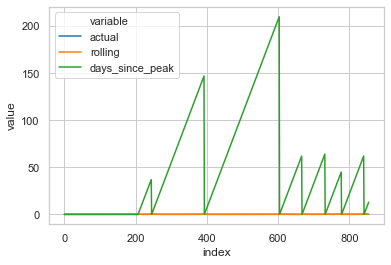

In [10]:
sns.lineplot(x="index", y="value", hue="variable", data=pd.melt(df, ["index", "Close"]))

Text(0.5, 1.05, 'The peaks are indicated with a red-coloured dot. The data ranges from 2004—2020.')

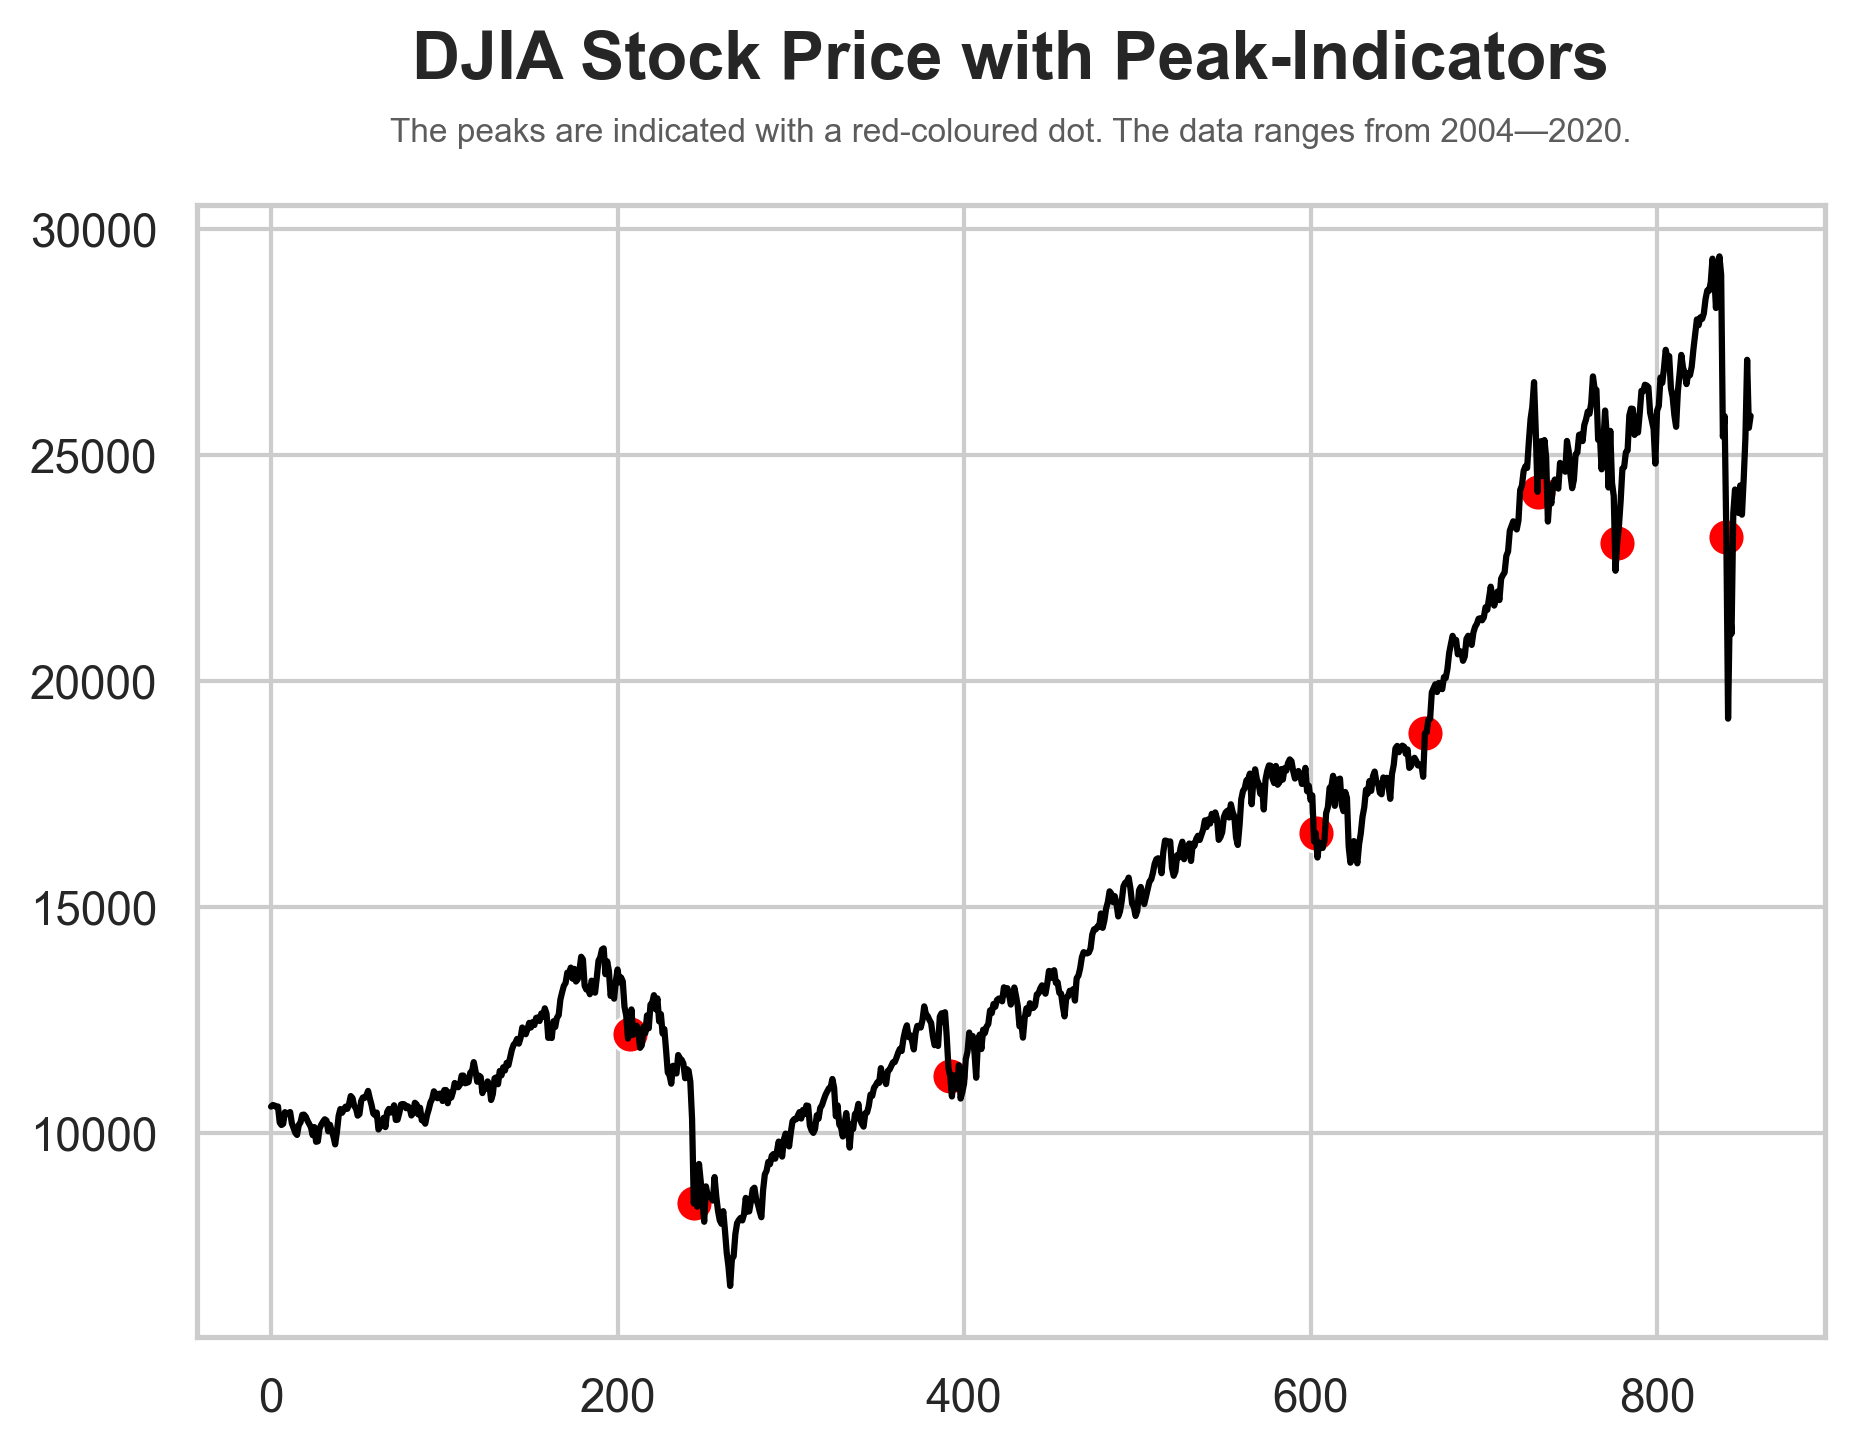

In [11]:
import matplotlib.pyplot as plt


sns.set_style("whitegrid", {"font.sans_serif": "Liberation Sans"})
sns.set_context("notebook")

fig, ax = plt.subplots(1, 1, figsize = (7, 5), dpi=300)

sns.lineplot(data=df["Close"], color="black")
sns.scatterplot(peaks, df["Close"][peaks], color="r", s=80)

ax.set_ylabel("")
ax.set_xlabel("")
ax.text(x=0.5, y=1.1, s="DJIA Stock Price with Peak-Indicators", fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s="The peaks are indicated with a red-coloured dot. The data ranges from 2004—2020.", fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes, )



# fig.savefig("graph1.png")

In [12]:
for i in range(10):
    df[f"peak_{i}"] = 0

i = 0
j = 0
k = 0
while i < len(df):    
    if i >= peaks[j]:
        if k < 10:
            df.loc[i, f"peak_{k}"] = 1
        k += 1
        
    try:
        if i == peaks[j+1]:
            k = 0
            j += 1
    except IndexError:
        pass
        
    i += 1

In [13]:
daily_data = pd.read_csv("../data/raw/daily/stock_market.csv")

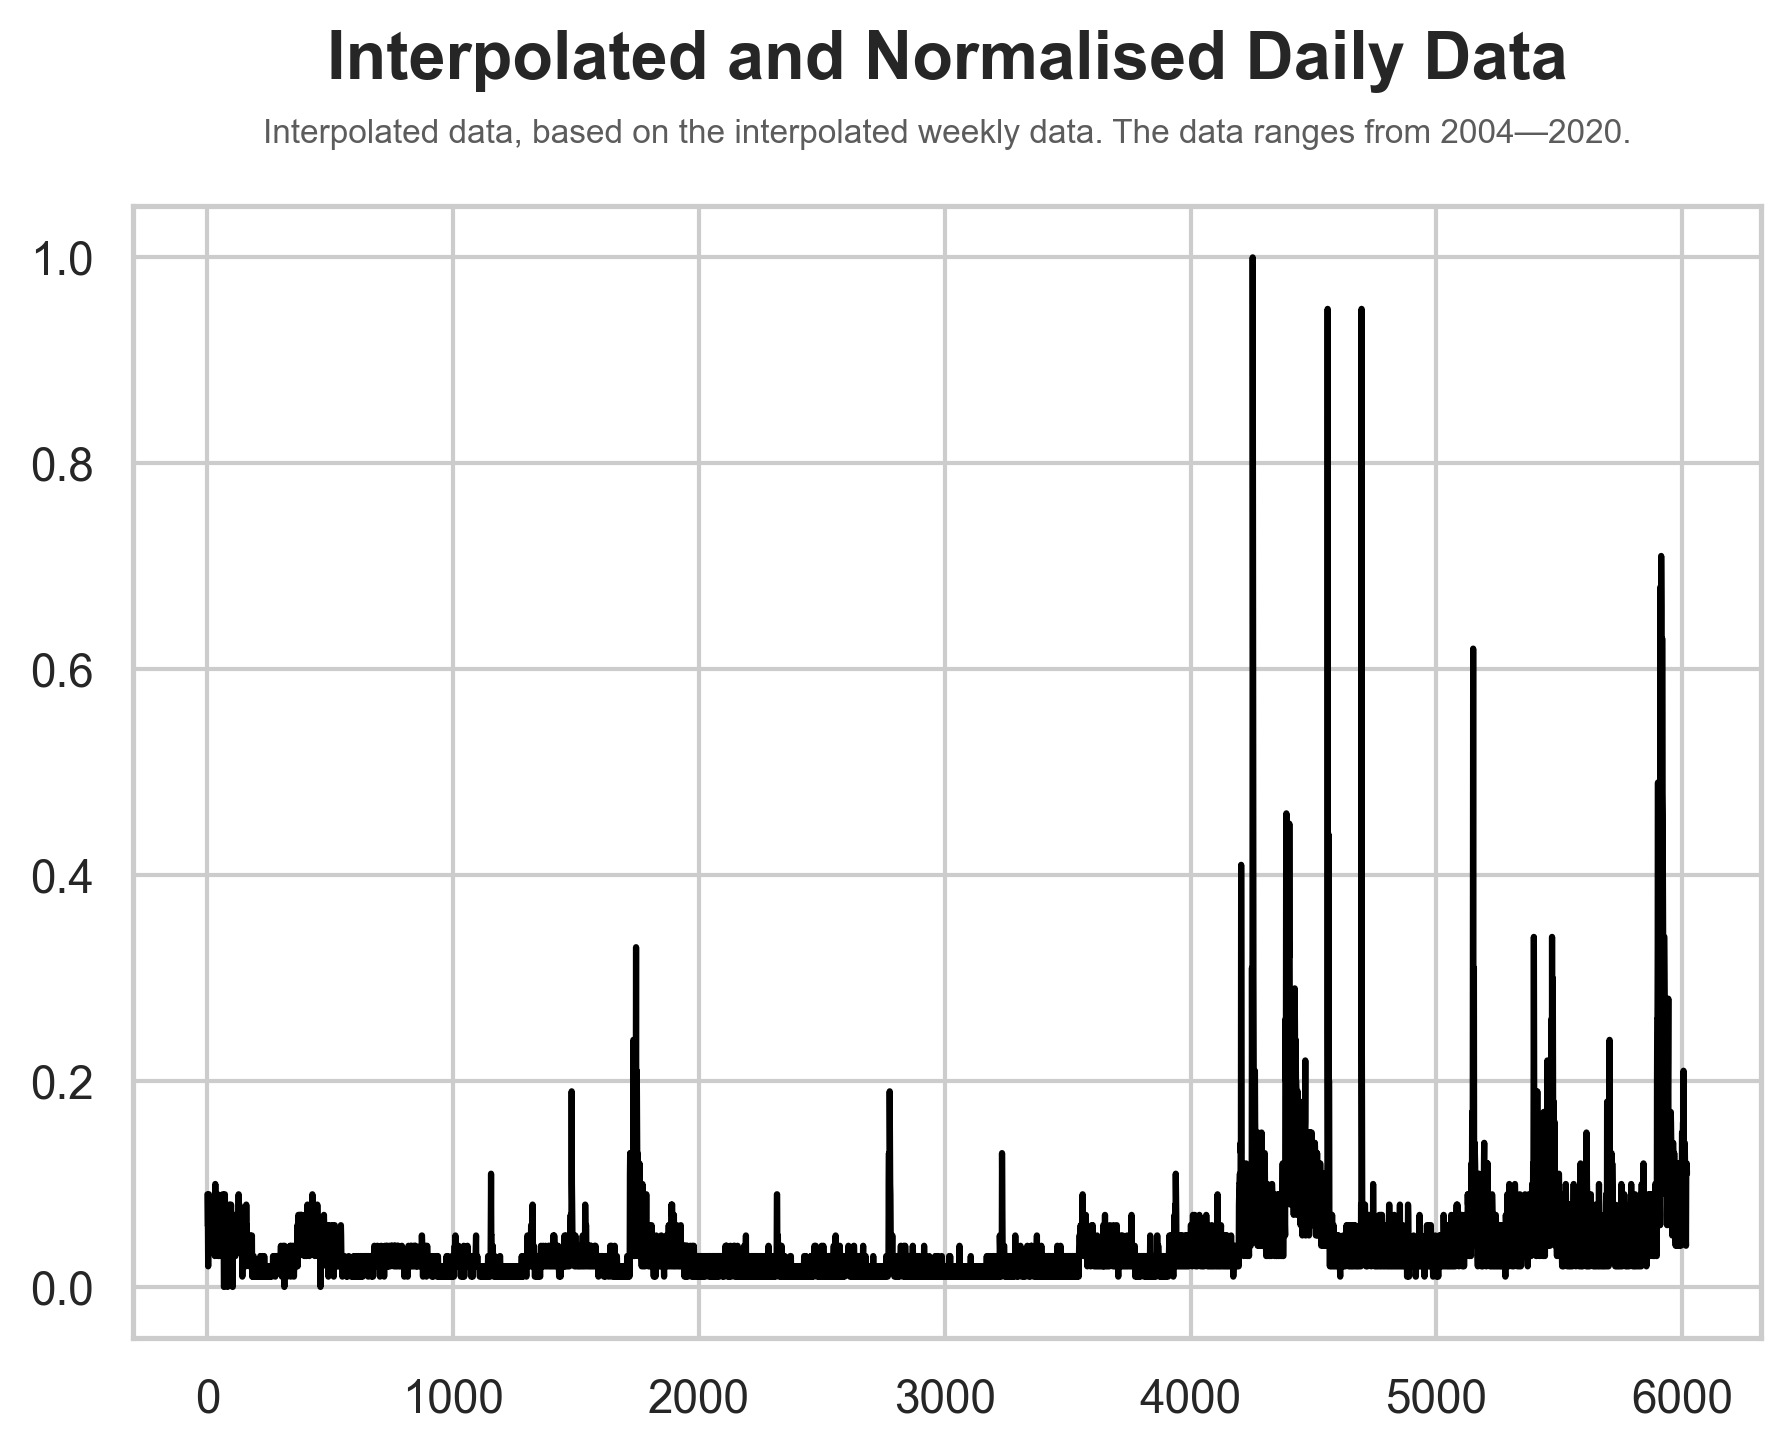

In [14]:
import matplotlib.pyplot as plt


sns.set_style("whitegrid", {"font.sans_serif": "Liberation Sans"})
sns.set_context("notebook")

fig, ax = plt.subplots(1, 1, figsize = (7, 5), dpi=300)

sns.lineplot(data=daily_data.Adjusted, color="black")

ax.set_ylabel("")
ax.set_xlabel("")
ax.text(x=0.5, y=1.1, s="Interpolated and Normalised Daily Data", fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s="Interpolated data, based on the interpolated weekly data. The data ranges from 2004—2020.", fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes, )



fig.savefig("graph1.png")

In [15]:
unadjusted_data = pd.read_csv("../deployment/data/data.csv")

Text(0.5, 1.05, 'The actual monthly data for this timespan, ')

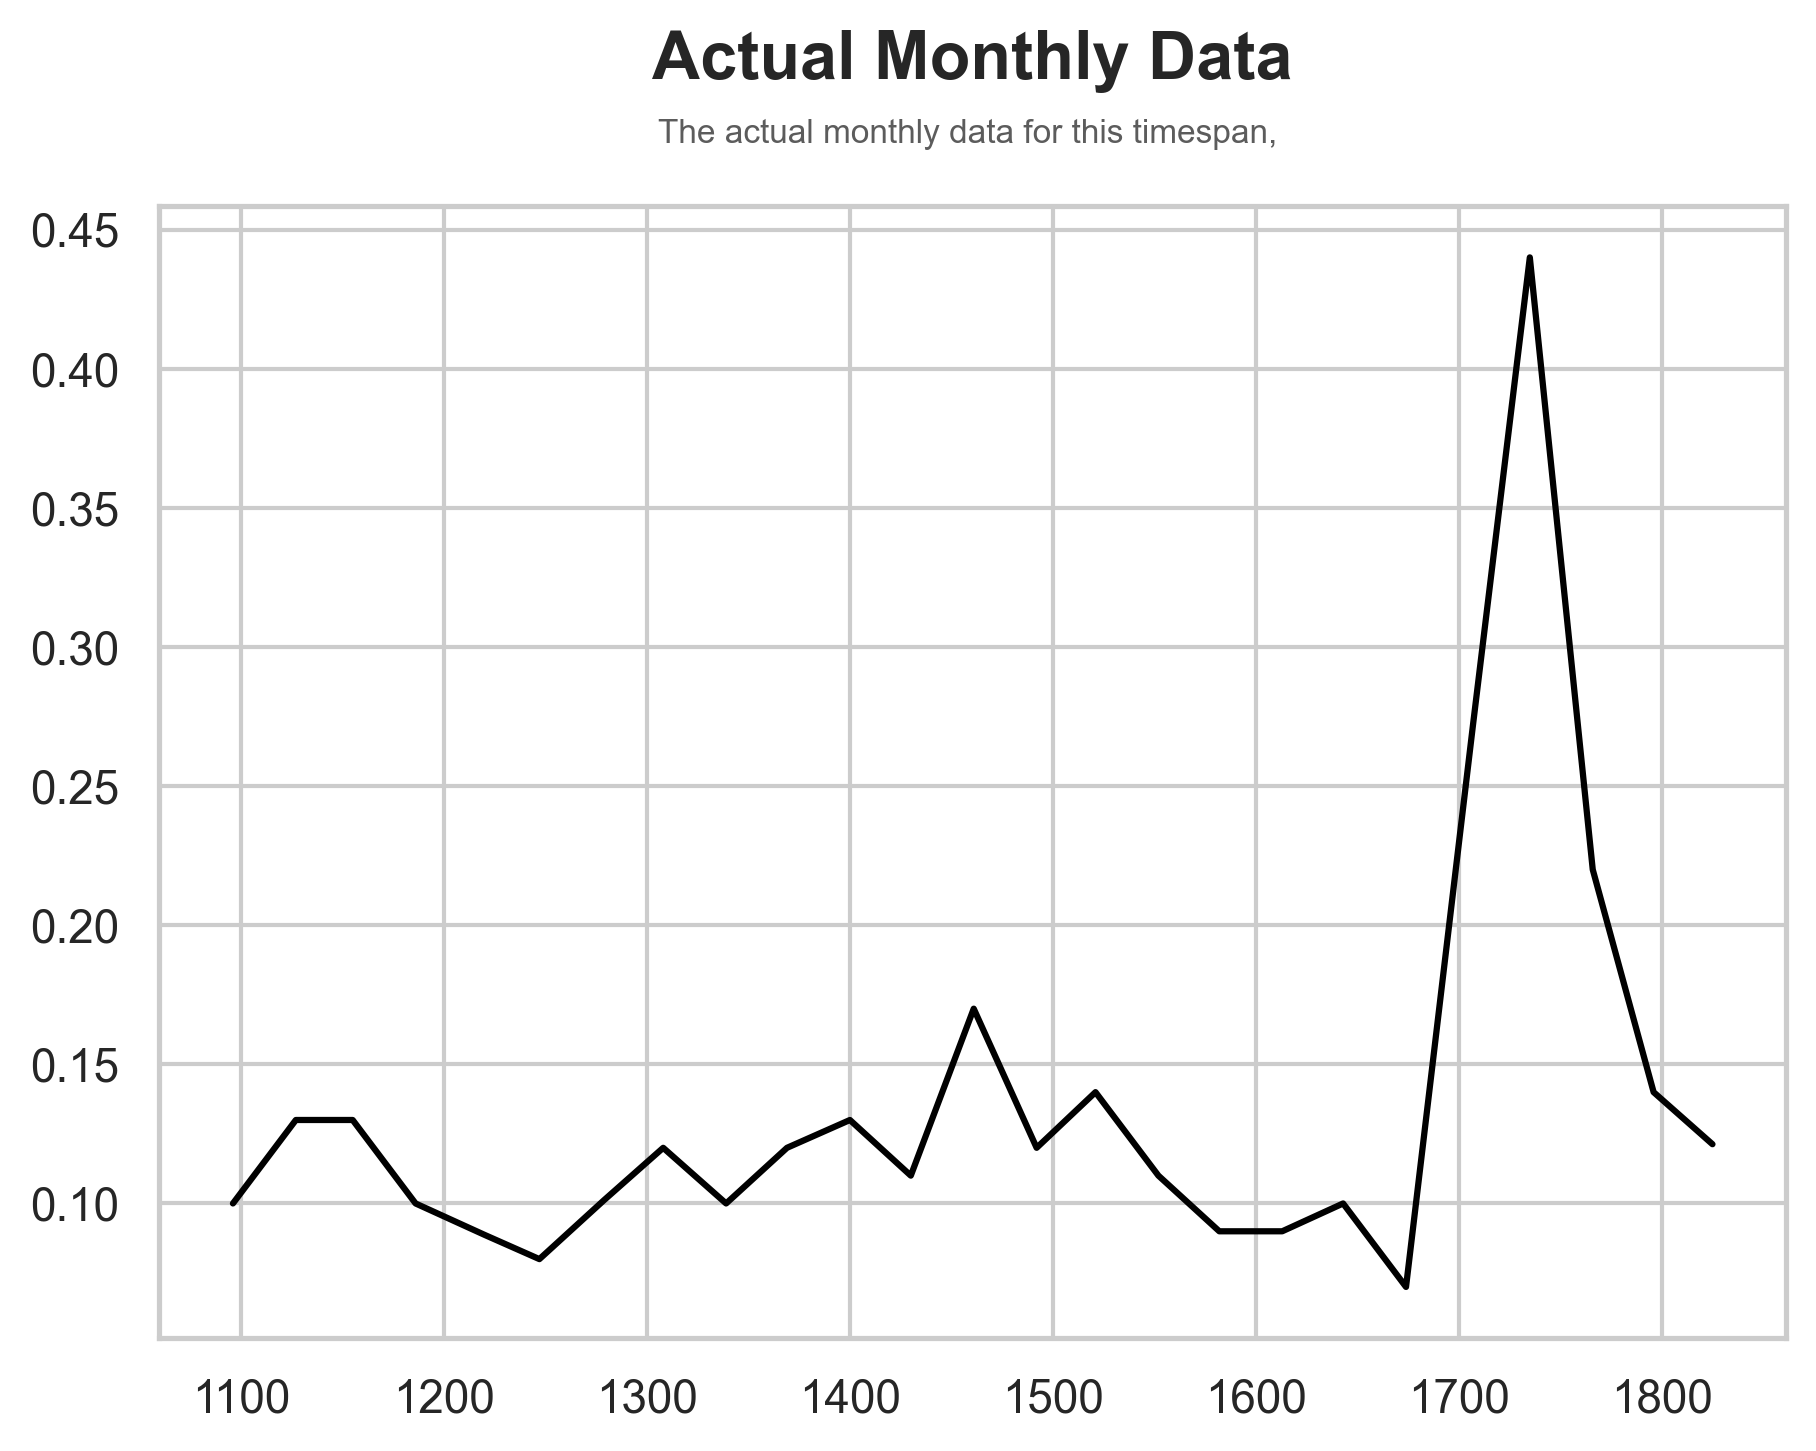

In [16]:
import matplotlib.pyplot as plt


sns.set_style("whitegrid", {"font.sans_serif": "Liberation Sans"})
sns.set_context("notebook")

fig, ax = plt.subplots(1, 1, figsize = (7, 5), dpi=300)

sns.lineplot(data=unadjusted_data.monthly[1096:1826]/100, color="black")

ax.set_ylabel("")
ax.set_xlabel("")
ax.text(x=0.5, y=1.1, s="Actual Monthly Data", fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s="The actual monthly data for this timespan, ", fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes, )



# fig.savefig("graph1.png")

Text(0, 0.5, 'Relative Search Volume')

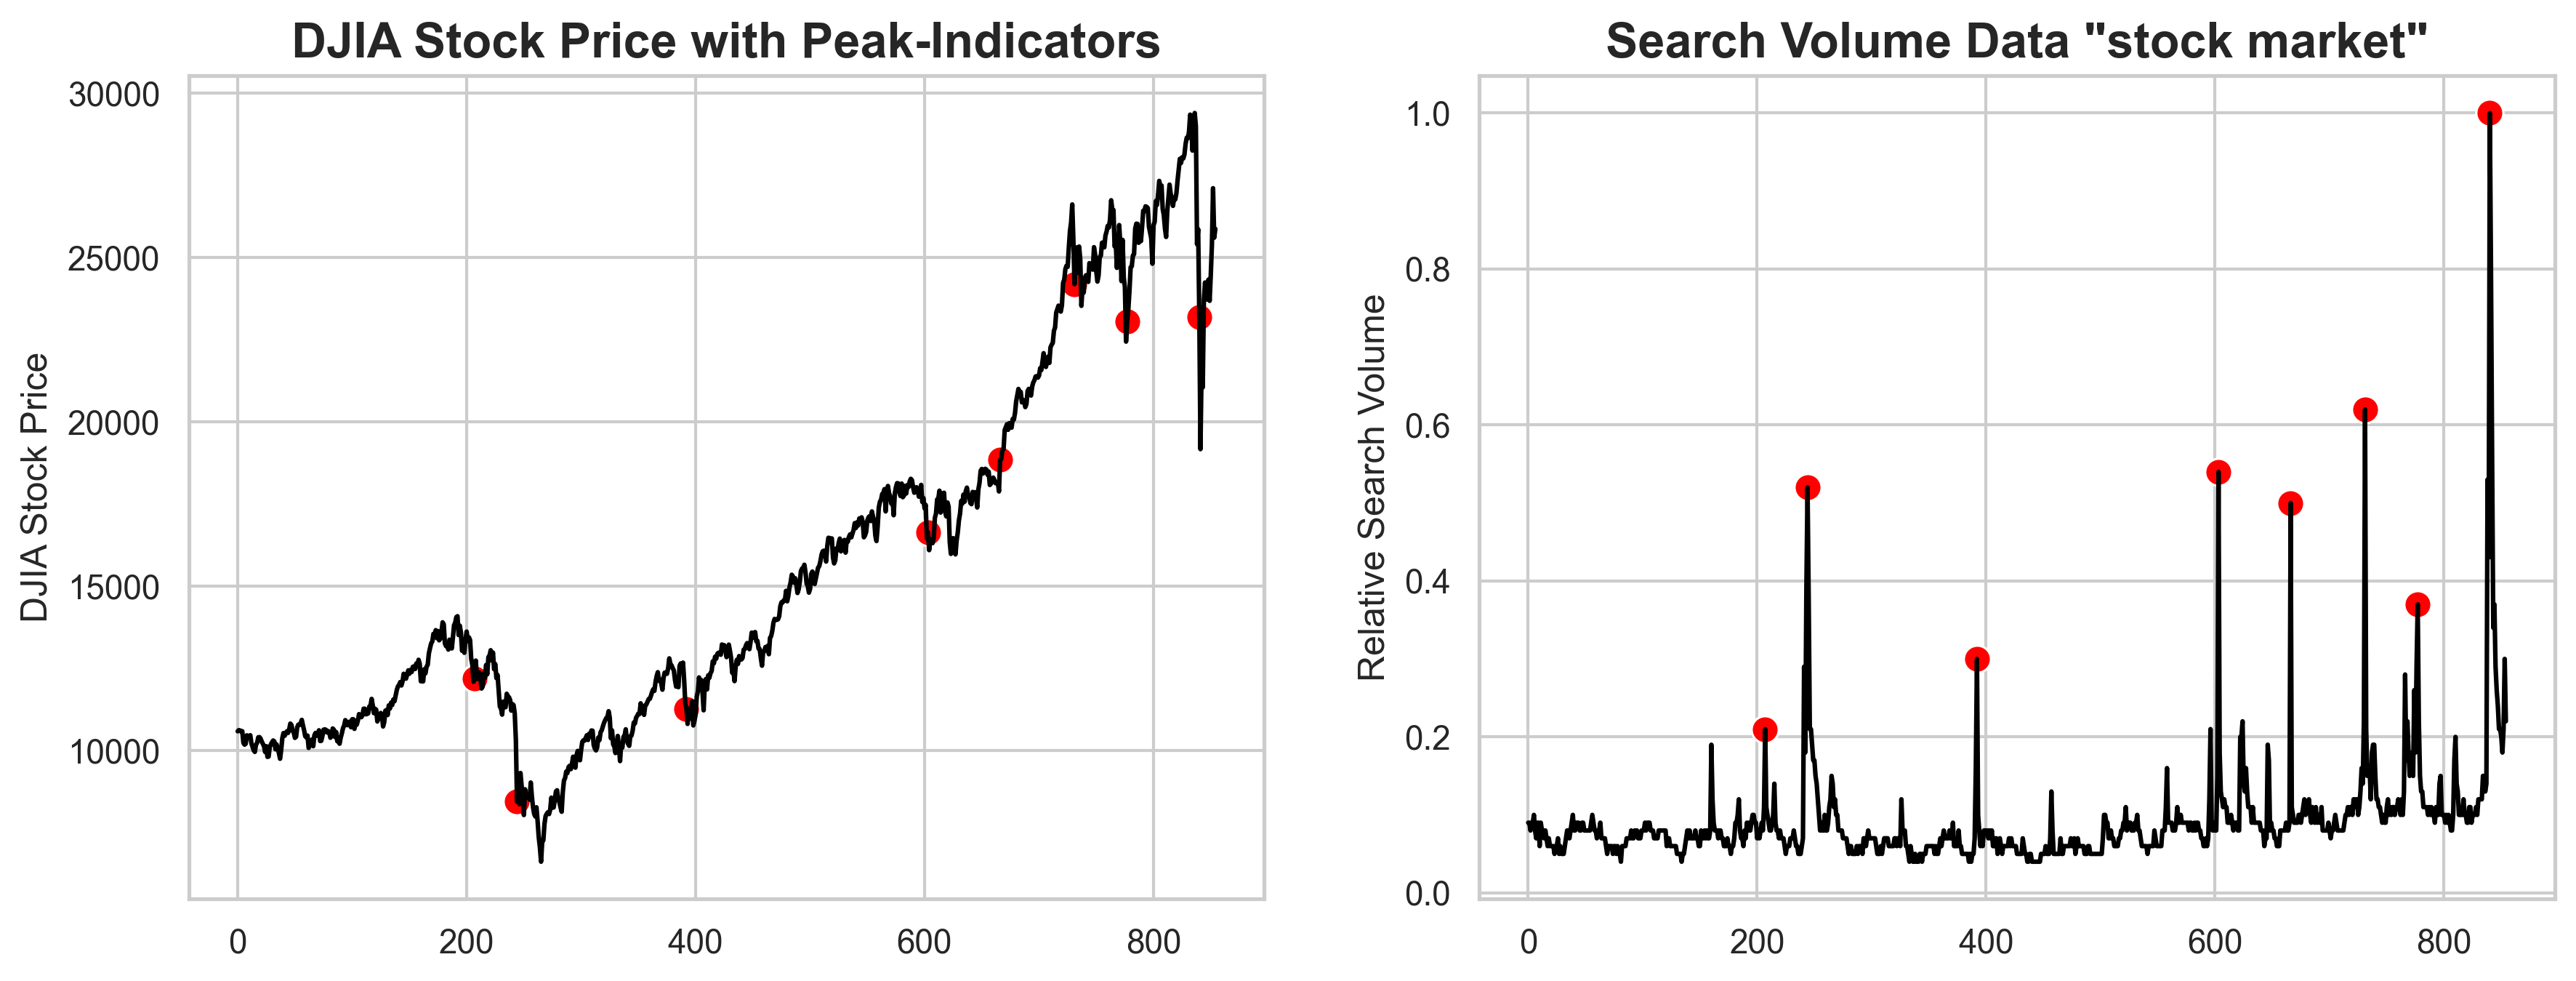

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5), dpi=300)

sns.lineplot(data=df["Close"], color="black", ax=axs[0])
sns.scatterplot(peaks, df["Close"][peaks], color="r", s=80, ax=axs[0])

sns.lineplot(y=x, x=df["index"], color="black", ax=axs[1])
sns.scatterplot(peaks, x[peaks], color="r", s=80, ax=axs[1])

axs[0].set_title("DJIA Stock Price with Peak-Indicators", fontsize=16, weight="bold")
axs[0].set_xlabel("")
axs[0].set_ylabel("DJIA Stock Price")

axs[1].set_title('Search Volume Data "stock market"', fontsize=16, weight="bold")
axs[1].set_xlabel("")
axs[1].set_ylabel("Relative Search Volume")

In [18]:
data = data.drop("lag_1", axis=1)

Text(0.5, 0, 'Day')

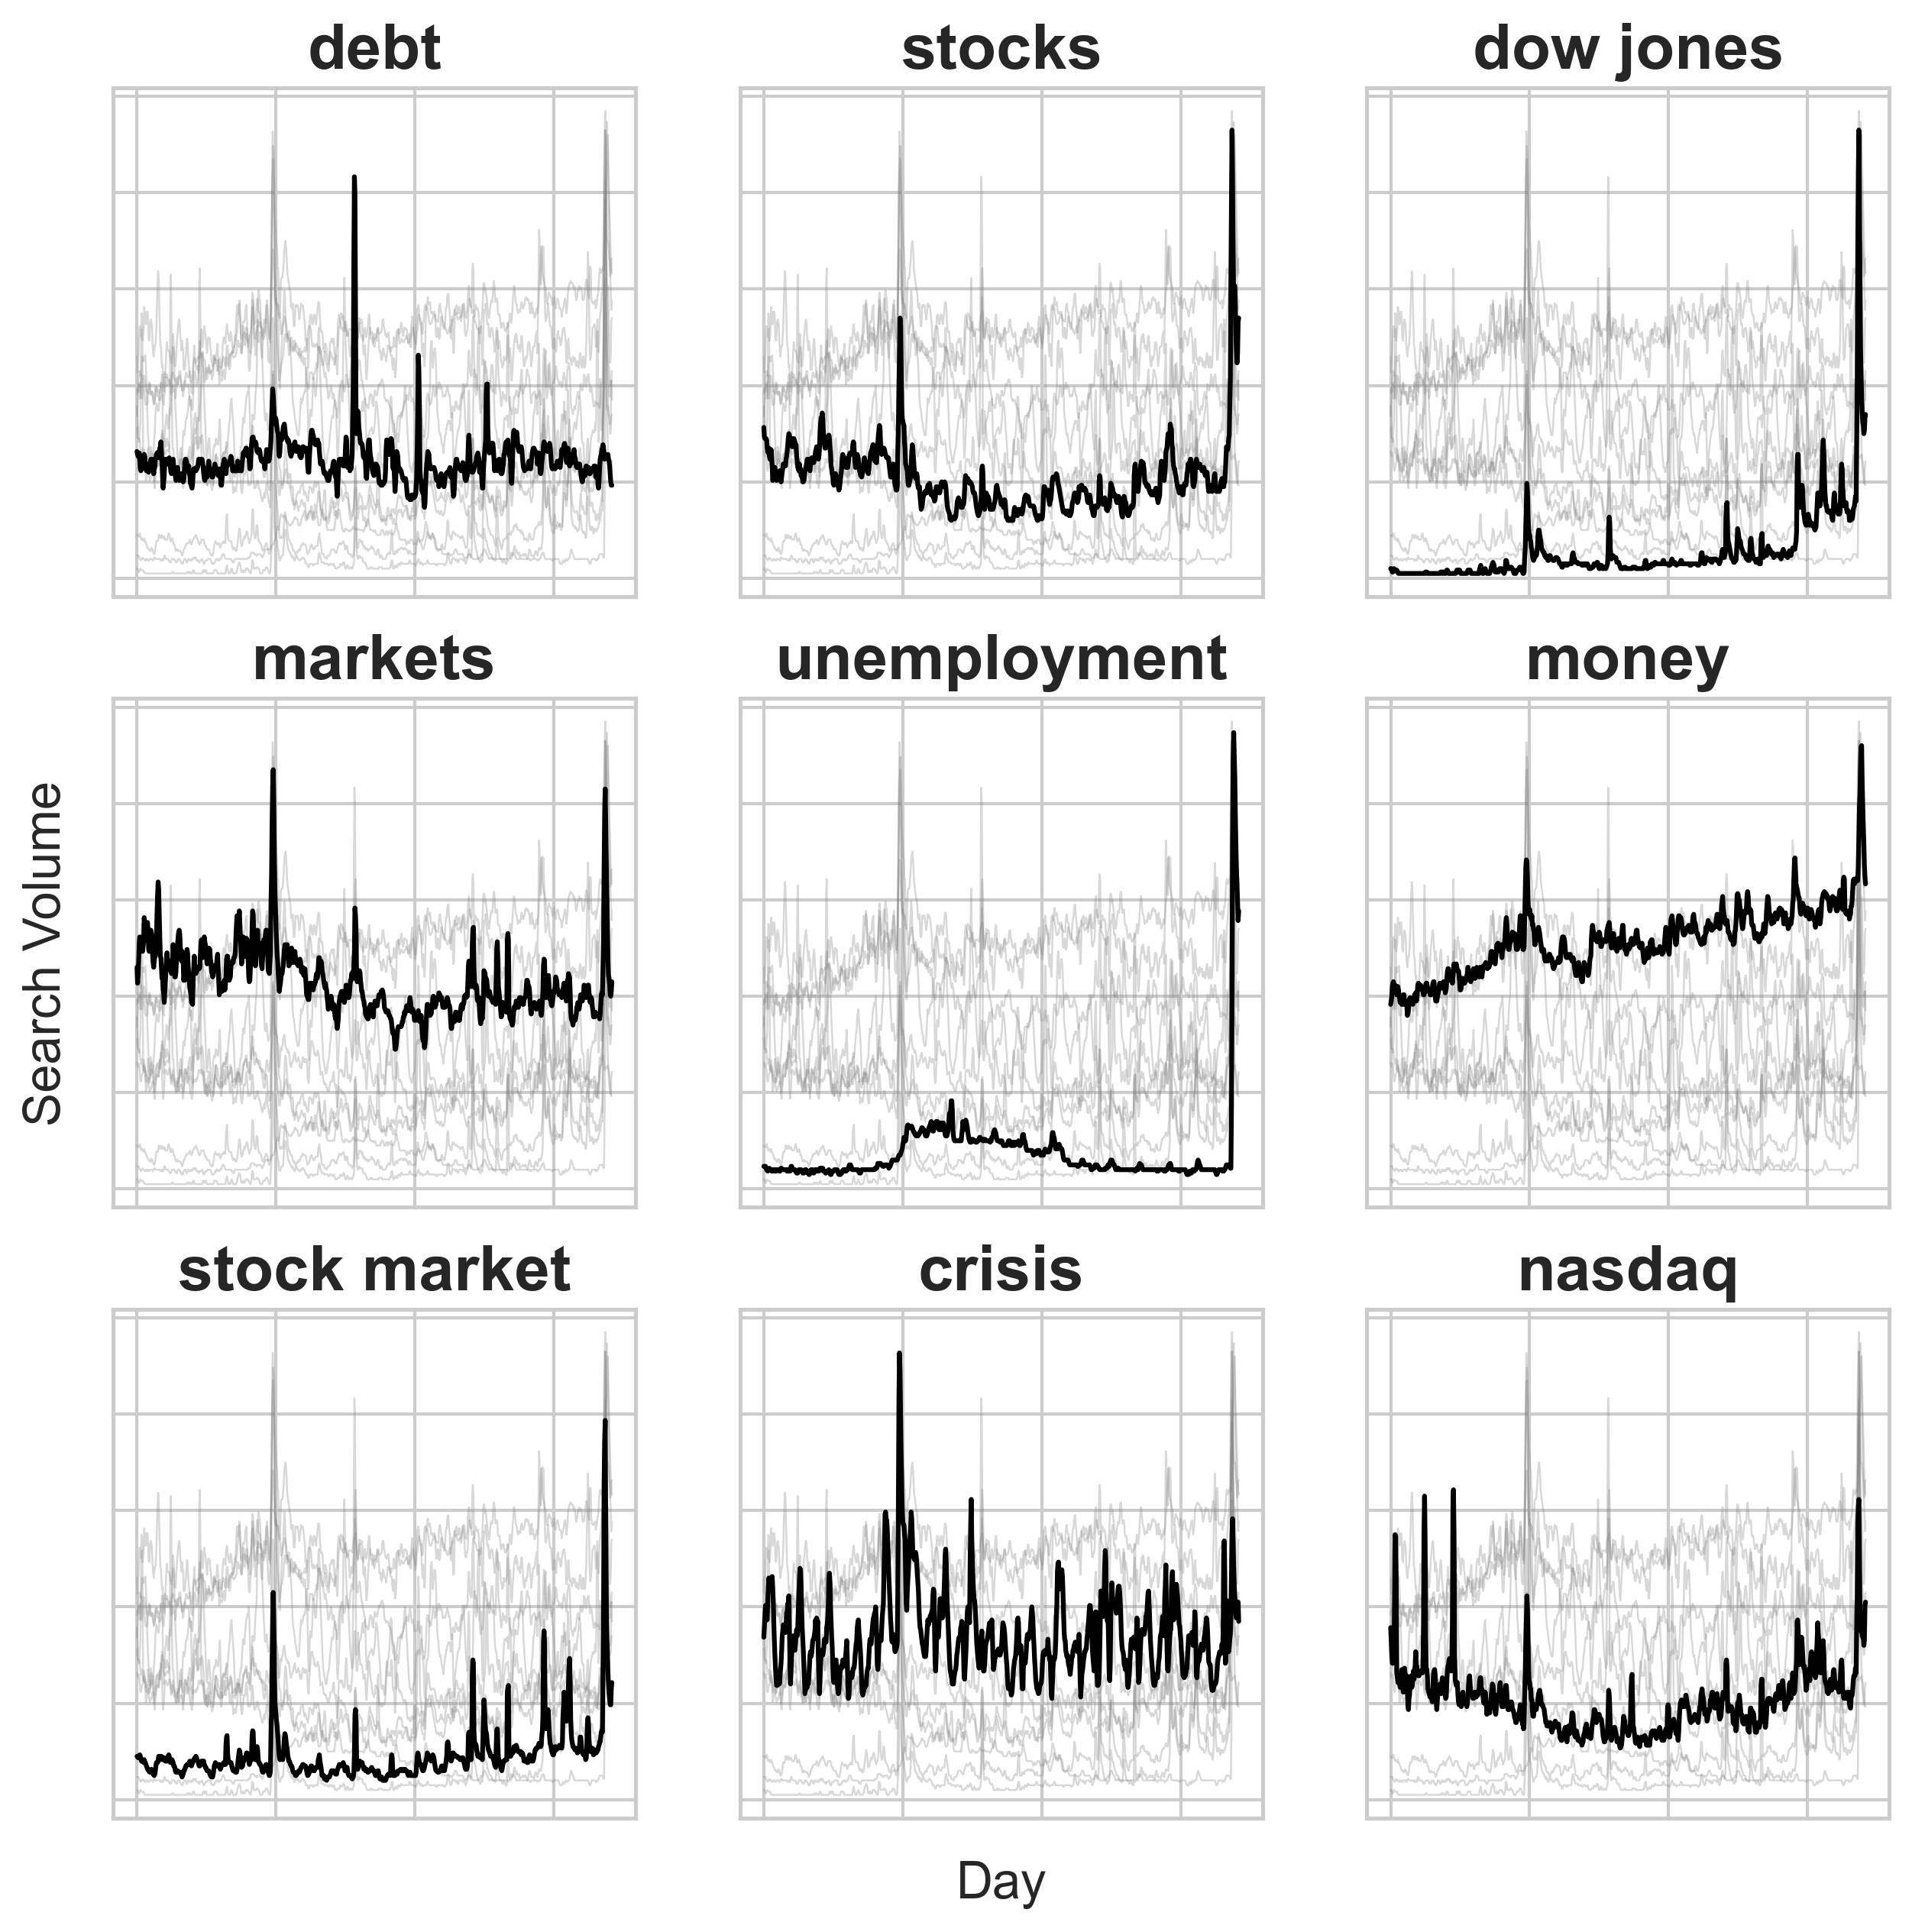

In [19]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 10), dpi=300)

i = 2

for j in range(3):
    for k in range(3):
        l = 2
        while l <= 11:
            sns.lineplot(x="index", y=data.columns[l], marker='', color='grey', linewidth=0.6, alpha=0.3, data=data, ax=axs[j][k])
            l += 1
        
        sns.lineplot(x="index", y=data.columns[i], data=data, ax=axs[j][k], color="black")
        
        axs[j][k].set_xlabel("")
        axs[j][k].set_ylabel("")
        axs[j][k].set(xticklabels=[])
        axs[j][k].set(yticklabels=[])
        
        axs[j][k].set_title(data.columns[i].replace("_", " "), fontweight="bold", fontsize=20)
        i += 1
        
axs[1][0].set_ylabel("Search Volume", fontsize=16)
axs[2][1].set_xlabel("Day", fontsize=16)

Text(0.5, 0, 'Target (left: stock price decrease, right: stock price increase)')

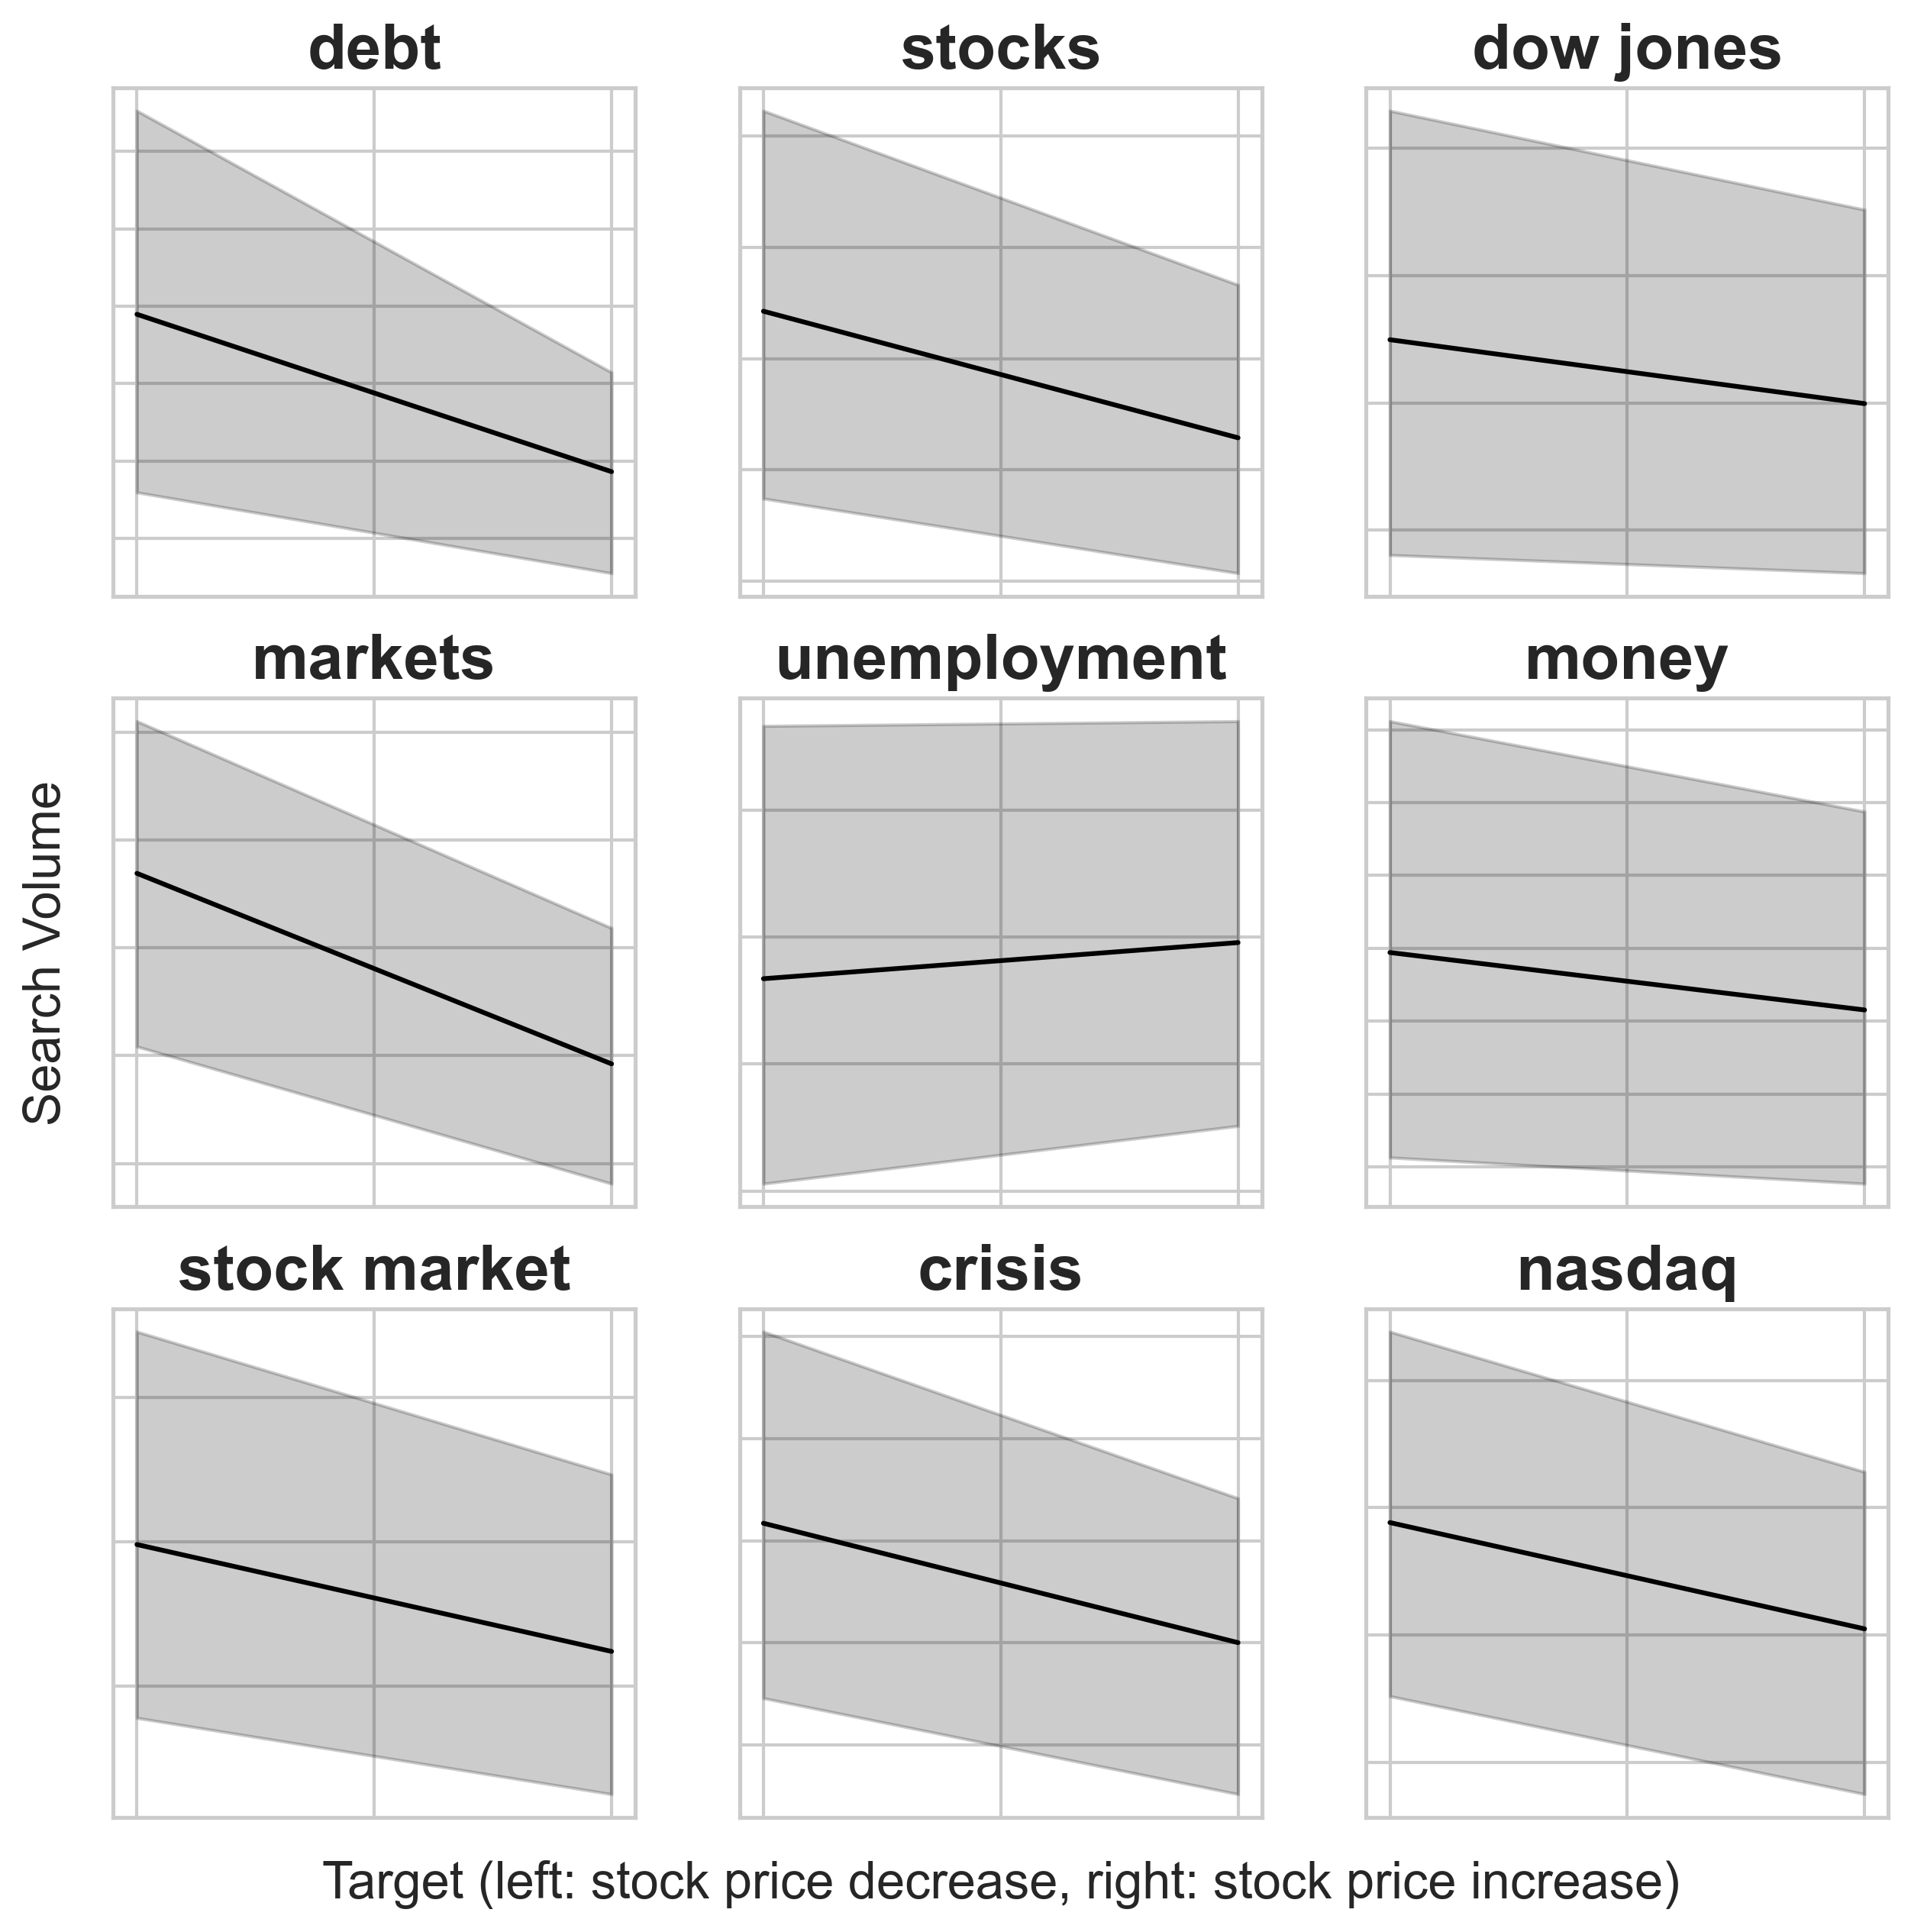

In [20]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 10), dpi=300)

i = 2

for j in range(3):
    for k in range(3):
        sns.lineplot(x="Target", y=data.columns[i], data=data[1:], ax=axs[j][k], color="black")
        
        axs[j][k].set_xlabel("")
        axs[j][k].set_ylabel("")
        axs[j][k].set(xticklabels=[])
        axs[j][k].set(yticklabels=[])
        
        axs[j][k].set_title(data.columns[i].replace("_", " "), fontweight="bold", fontsize=20)
        i += 1

axs[1][0].set_ylabel("Search Volume", fontsize=16)
axs[2][1].set_xlabel("Target (left: stock price decrease, right: stock price increase)", fontsize=16)